## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  50.422513  1686.475967  0.858158   7.666920  1.670405
1  64.946199   735.812922  0.126713   6.510884  0.927856
2  76.671955  1333.898697  0.811437  10.888911  1.666705
3  14.490491   152.414173  0.444446   2.642440  1.293882
4  57.491203   403.110824  0.741841   5.491447  1.446328


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.81721 | train_mse: 5.13683 | train_mae: 1.58739 |  0:00:00s
epoch 1  | loss: 0.71621 | train_mse: 2.96687 | train_mae: 1.18653 |  0:00:00s
epoch 2  | loss: 0.74338 | train_mse: 1.84026 | train_mae: 1.00542 |  0:00:00s


epoch 3  | loss: 0.58602 | train_mse: 1.30694 | train_mae: 0.89028 |  0:00:00s
epoch 4  | loss: 0.40691 | train_mse: 1.58023 | train_mae: 0.96409 |  0:00:00s
epoch 5  | loss: 0.51685 | train_mse: 1.12477 | train_mae: 0.79127 |  0:00:00s


epoch 6  | loss: 0.33892 | train_mse: 0.93007 | train_mae: 0.67823 |  0:00:00s
epoch 7  | loss: 0.32926 | train_mse: 0.8331  | train_mae: 0.6449  |  0:00:00s
epoch 8  | loss: 0.2627  | train_mse: 0.82178 | train_mae: 0.66676 |  0:00:00s


epoch 9  | loss: 0.28637 | train_mse: 0.89209 | train_mae: 0.71041 |  0:00:01s
epoch 10 | loss: 0.32096 | train_mse: 0.76577 | train_mae: 0.66976 |  0:00:01s
epoch 11 | loss: 0.29084 | train_mse: 0.69233 | train_mae: 0.63912 |  0:00:01s


epoch 12 | loss: 0.29728 | train_mse: 0.47209 | train_mae: 0.53076 |  0:00:01s
epoch 13 | loss: 0.27604 | train_mse: 0.39233 | train_mae: 0.48366 |  0:00:01s
epoch 14 | loss: 0.20696 | train_mse: 0.50016 | train_mae: 0.53573 |  0:00:01s


epoch 15 | loss: 0.34717 | train_mse: 0.55405 | train_mae: 0.57752 |  0:00:01s
epoch 16 | loss: 0.25948 | train_mse: 0.50941 | train_mae: 0.52254 |  0:00:01s
epoch 17 | loss: 0.29367 | train_mse: 0.43191 | train_mae: 0.49252 |  0:00:01s


epoch 18 | loss: 0.29427 | train_mse: 0.40106 | train_mae: 0.49604 |  0:00:01s
epoch 19 | loss: 0.23329 | train_mse: 0.34488 | train_mae: 0.45941 |  0:00:01s
epoch 20 | loss: 0.26101 | train_mse: 0.36037 | train_mae: 0.46826 |  0:00:02s


epoch 21 | loss: 0.33692 | train_mse: 0.36603 | train_mae: 0.48476 |  0:00:02s
epoch 22 | loss: 0.42623 | train_mse: 0.3918  | train_mae: 0.49538 |  0:00:02s


epoch 23 | loss: 0.39809 | train_mse: 0.45142 | train_mae: 0.5177  |  0:00:02s
epoch 24 | loss: 0.27233 | train_mse: 0.47361 | train_mae: 0.52623 |  0:00:02s
epoch 25 | loss: 0.38723 | train_mse: 0.40139 | train_mae: 0.4727  |  0:00:02s


epoch 26 | loss: 0.34779 | train_mse: 0.21677 | train_mae: 0.38273 |  0:00:02s
epoch 27 | loss: 0.19864 | train_mse: 0.19621 | train_mae: 0.36648 |  0:00:02s
epoch 28 | loss: 0.19122 | train_mse: 0.29624 | train_mae: 0.39255 |  0:00:02s


epoch 29 | loss: 0.20183 | train_mse: 0.32182 | train_mae: 0.41985 |  0:00:02s
epoch 30 | loss: 0.239   | train_mse: 0.34333 | train_mae: 0.43506 |  0:00:02s
epoch 31 | loss: 0.33059 | train_mse: 0.36817 | train_mae: 0.44937 |  0:00:02s


epoch 32 | loss: 0.43562 | train_mse: 0.44928 | train_mae: 0.47558 |  0:00:03s
epoch 33 | loss: 0.36504 | train_mse: 0.37989 | train_mae: 0.46299 |  0:00:03s
epoch 34 | loss: 0.35015 | train_mse: 0.31967 | train_mae: 0.42319 |  0:00:03s


epoch 35 | loss: 0.40503 | train_mse: 0.22429 | train_mae: 0.39097 |  0:00:03s
epoch 36 | loss: 0.35747 | train_mse: 0.19331 | train_mae: 0.35949 |  0:00:03s
epoch 37 | loss: 0.18292 | train_mse: 0.17234 | train_mae: 0.33234 |  0:00:03s


epoch 38 | loss: 0.23204 | train_mse: 0.16995 | train_mae: 0.33995 |  0:00:03s
epoch 39 | loss: 0.21902 | train_mse: 0.15735 | train_mae: 0.32862 |  0:00:03s
epoch 40 | loss: 0.21763 | train_mse: 0.1826  | train_mae: 0.34595 |  0:00:03s


epoch 41 | loss: 0.20989 | train_mse: 0.20723 | train_mae: 0.35563 |  0:00:03s
epoch 42 | loss: 0.1865  | train_mse: 0.17653 | train_mae: 0.34206 |  0:00:03s
epoch 43 | loss: 0.18473 | train_mse: 0.18303 | train_mae: 0.34111 |  0:00:03s


epoch 44 | loss: 0.24026 | train_mse: 0.1922  | train_mae: 0.33688 |  0:00:04s
epoch 45 | loss: 0.16501 | train_mse: 0.23202 | train_mae: 0.36993 |  0:00:04s


epoch 46 | loss: 0.22091 | train_mse: 0.2398  | train_mae: 0.37398 |  0:00:04s
epoch 47 | loss: 0.14436 | train_mse: 0.29495 | train_mae: 0.38172 |  0:00:04s
epoch 48 | loss: 0.23789 | train_mse: 0.20319 | train_mae: 0.34723 |  0:00:04s


epoch 49 | loss: 0.23029 | train_mse: 0.22115 | train_mae: 0.36553 |  0:00:04s
epoch 50 | loss: 0.2933  | train_mse: 0.2434  | train_mae: 0.38752 |  0:00:04s
epoch 51 | loss: 0.1879  | train_mse: 0.23857 | train_mae: 0.38466 |  0:00:04s


epoch 52 | loss: 0.26063 | train_mse: 0.24197 | train_mae: 0.38799 |  0:00:04s
epoch 53 | loss: 0.24764 | train_mse: 0.17492 | train_mae: 0.33298 |  0:00:04s
epoch 54 | loss: 0.16807 | train_mse: 0.15598 | train_mae: 0.32807 |  0:00:04s


epoch 55 | loss: 0.16246 | train_mse: 0.14272 | train_mae: 0.31131 |  0:00:05s
epoch 56 | loss: 0.15883 | train_mse: 0.10517 | train_mae: 0.25974 |  0:00:05s
epoch 57 | loss: 0.14231 | train_mse: 0.10387 | train_mae: 0.25653 |  0:00:05s


epoch 58 | loss: 0.12378 | train_mse: 0.10946 | train_mae: 0.25809 |  0:00:05s
epoch 59 | loss: 0.20858 | train_mse: 0.11034 | train_mae: 0.26245 |  0:00:05s
epoch 60 | loss: 0.39342 | train_mse: 0.17954 | train_mae: 0.3244  |  0:00:05s


epoch 61 | loss: 0.21028 | train_mse: 0.20119 | train_mae: 0.33348 |  0:00:05s
epoch 62 | loss: 0.24914 | train_mse: 0.18783 | train_mae: 0.31345 |  0:00:05s
epoch 63 | loss: 0.17484 | train_mse: 0.20245 | train_mae: 0.33143 |  0:00:05s


epoch 64 | loss: 0.23888 | train_mse: 0.18954 | train_mae: 0.32623 |  0:00:05s
epoch 65 | loss: 0.32884 | train_mse: 0.18304 | train_mae: 0.32666 |  0:00:05s
epoch 66 | loss: 0.25055 | train_mse: 0.17663 | train_mae: 0.31892 |  0:00:06s


epoch 67 | loss: 0.15004 | train_mse: 0.16045 | train_mae: 0.31906 |  0:00:06s
epoch 68 | loss: 0.15639 | train_mse: 0.17224 | train_mae: 0.31983 |  0:00:06s


epoch 69 | loss: 0.21288 | train_mse: 0.15202 | train_mae: 0.30224 |  0:00:06s
epoch 70 | loss: 0.2272  | train_mse: 0.1448  | train_mae: 0.2944  |  0:00:06s
epoch 71 | loss: 0.17882 | train_mse: 0.14923 | train_mae: 0.2887  |  0:00:06s


epoch 72 | loss: 0.17086 | train_mse: 0.15589 | train_mae: 0.30197 |  0:00:06s
epoch 73 | loss: 0.17369 | train_mse: 0.15993 | train_mae: 0.30253 |  0:00:06s
epoch 74 | loss: 0.19232 | train_mse: 0.16042 | train_mae: 0.30258 |  0:00:06s


epoch 75 | loss: 0.13692 | train_mse: 0.15933 | train_mae: 0.305   |  0:00:06s
epoch 76 | loss: 0.19619 | train_mse: 0.15902 | train_mae: 0.3111  |  0:00:06s
epoch 77 | loss: 0.19158 | train_mse: 0.1247  | train_mae: 0.27095 |  0:00:06s


epoch 78 | loss: 0.16655 | train_mse: 0.13367 | train_mae: 0.28043 |  0:00:07s
epoch 79 | loss: 0.16984 | train_mse: 0.14567 | train_mae: 0.29684 |  0:00:07s
epoch 80 | loss: 0.17799 | train_mse: 0.13776 | train_mae: 0.28998 |  0:00:07s


epoch 81 | loss: 0.16427 | train_mse: 0.12662 | train_mae: 0.2797  |  0:00:07s
epoch 82 | loss: 0.16164 | train_mse: 0.12372 | train_mae: 0.27167 |  0:00:07s
epoch 83 | loss: 0.20818 | train_mse: 0.11626 | train_mae: 0.26074 |  0:00:07s


epoch 84 | loss: 0.15054 | train_mse: 0.13243 | train_mae: 0.28511 |  0:00:07s
epoch 85 | loss: 0.26478 | train_mse: 0.13222 | train_mae: 0.27926 |  0:00:07s
epoch 86 | loss: 0.26931 | train_mse: 0.12904 | train_mae: 0.28099 |  0:00:07s


epoch 87 | loss: 0.25481 | train_mse: 0.15921 | train_mae: 0.31571 |  0:00:07s
epoch 88 | loss: 0.16612 | train_mse: 0.1414  | train_mae: 0.29391 |  0:00:07s
epoch 89 | loss: 0.16906 | train_mse: 0.12471 | train_mae: 0.27363 |  0:00:07s


epoch 90 | loss: 0.15202 | train_mse: 0.12039 | train_mae: 0.26673 |  0:00:08s
epoch 91 | loss: 0.12621 | train_mse: 0.10367 | train_mae: 0.25114 |  0:00:08s
epoch 92 | loss: 0.15919 | train_mse: 0.10061 | train_mae: 0.24906 |  0:00:08s


epoch 93 | loss: 0.32793 | train_mse: 0.10398 | train_mae: 0.25523 |  0:00:08s
epoch 94 | loss: 0.19565 | train_mse: 0.11494 | train_mae: 0.26976 |  0:00:08s
epoch 95 | loss: 0.17687 | train_mse: 0.10646 | train_mae: 0.25483 |  0:00:08s


epoch 96 | loss: 0.14152 | train_mse: 0.09669 | train_mae: 0.24482 |  0:00:08s
epoch 97 | loss: 0.17637 | train_mse: 0.1093  | train_mae: 0.26806 |  0:00:08s
epoch 98 | loss: 0.18247 | train_mse: 0.11308 | train_mae: 0.27032 |  0:00:08s


epoch 99 | loss: 0.1741  | train_mse: 0.12249 | train_mae: 0.28065 |  0:00:08s
epoch 100| loss: 0.10748 | train_mse: 0.11192 | train_mae: 0.26386 |  0:00:08s
epoch 101| loss: 0.11412 | train_mse: 0.11513 | train_mae: 0.26585 |  0:00:08s


epoch 102| loss: 0.17968 | train_mse: 0.10854 | train_mae: 0.25434 |  0:00:09s
epoch 103| loss: 0.12695 | train_mse: 0.09269 | train_mae: 0.23513 |  0:00:09s
epoch 104| loss: 0.10359 | train_mse: 0.10017 | train_mae: 0.25707 |  0:00:09s


epoch 105| loss: 0.12509 | train_mse: 0.10196 | train_mae: 0.25556 |  0:00:09s
epoch 106| loss: 0.15176 | train_mse: 0.10964 | train_mae: 0.26108 |  0:00:09s
epoch 107| loss: 0.28963 | train_mse: 0.10743 | train_mae: 0.25877 |  0:00:09s


epoch 108| loss: 0.12666 | train_mse: 0.10467 | train_mae: 0.25544 |  0:00:09s
epoch 109| loss: 0.14068 | train_mse: 0.09843 | train_mae: 0.24815 |  0:00:09s
epoch 110| loss: 0.14969 | train_mse: 0.10056 | train_mae: 0.24939 |  0:00:09s


epoch 111| loss: 0.1254  | train_mse: 0.08491 | train_mae: 0.23225 |  0:00:09s
epoch 112| loss: 0.15458 | train_mse: 0.09212 | train_mae: 0.23774 |  0:00:09s
epoch 113| loss: 0.16601 | train_mse: 0.09006 | train_mae: 0.24272 |  0:00:09s


epoch 114| loss: 0.25077 | train_mse: 0.08932 | train_mae: 0.22899 |  0:00:10s


epoch 115| loss: 0.1437  | train_mse: 0.096   | train_mae: 0.23456 |  0:00:10s
epoch 116| loss: 0.1876  | train_mse: 0.09369 | train_mae: 0.24542 |  0:00:10s
epoch 117| loss: 0.2718  | train_mse: 0.10065 | train_mae: 0.24782 |  0:00:10s


epoch 118| loss: 0.14629 | train_mse: 0.08637 | train_mae: 0.23014 |  0:00:10s
epoch 119| loss: 0.1213  | train_mse: 0.10787 | train_mae: 0.25858 |  0:00:10s


epoch 120| loss: 0.13619 | train_mse: 0.10445 | train_mae: 0.24873 |  0:00:10s
epoch 121| loss: 0.19011 | train_mse: 0.09136 | train_mae: 0.23637 |  0:00:10s


epoch 122| loss: 0.12596 | train_mse: 0.10042 | train_mae: 0.251   |  0:00:11s
epoch 123| loss: 0.1564  | train_mse: 0.11318 | train_mae: 0.26935 |  0:00:11s


epoch 124| loss: 0.16547 | train_mse: 0.16048 | train_mae: 0.30738 |  0:00:11s
epoch 125| loss: 0.18293 | train_mse: 0.15745 | train_mae: 0.30575 |  0:00:11s


epoch 126| loss: 0.12714 | train_mse: 0.13802 | train_mae: 0.28796 |  0:00:11s
epoch 127| loss: 0.14399 | train_mse: 0.14059 | train_mae: 0.27598 |  0:00:11s
epoch 128| loss: 0.24697 | train_mse: 0.18723 | train_mae: 0.29688 |  0:00:11s


epoch 129| loss: 0.27001 | train_mse: 0.2215  | train_mae: 0.32095 |  0:00:12s
epoch 130| loss: 0.13573 | train_mse: 0.1264  | train_mae: 0.26695 |  0:00:12s


epoch 131| loss: 0.24922 | train_mse: 0.11111 | train_mae: 0.25608 |  0:00:12s
epoch 132| loss: 0.16472 | train_mse: 0.14356 | train_mae: 0.2883  |  0:00:12s


epoch 133| loss: 0.17961 | train_mse: 0.15681 | train_mae: 0.28756 |  0:00:12s
epoch 134| loss: 0.22142 | train_mse: 0.20514 | train_mae: 0.28764 |  0:00:12s


epoch 135| loss: 0.21809 | train_mse: 0.17887 | train_mae: 0.28885 |  0:00:12s
epoch 136| loss: 0.20948 | train_mse: 0.19389 | train_mae: 0.30535 |  0:00:12s
epoch 137| loss: 0.17027 | train_mse: 0.19145 | train_mae: 0.29868 |  0:00:13s


epoch 138| loss: 0.28458 | train_mse: 0.15735 | train_mae: 0.28817 |  0:00:13s
epoch 139| loss: 0.2454  | train_mse: 0.15177 | train_mae: 0.28971 |  0:00:13s
epoch 140| loss: 0.30568 | train_mse: 0.17209 | train_mae: 0.31181 |  0:00:13s


epoch 141| loss: 0.23911 | train_mse: 0.19576 | train_mae: 0.32872 |  0:00:13s
epoch 142| loss: 0.22493 | train_mse: 0.20305 | train_mae: 0.33811 |  0:00:13s
epoch 143| loss: 0.2507  | train_mse: 0.2004  | train_mae: 0.33662 |  0:00:13s


epoch 144| loss: 0.18545 | train_mse: 0.20369 | train_mae: 0.3408  |  0:00:13s
epoch 145| loss: 0.26201 | train_mse: 0.22711 | train_mae: 0.36311 |  0:00:13s
epoch 146| loss: 0.16494 | train_mse: 0.23071 | train_mae: 0.35278 |  0:00:13s


epoch 147| loss: 0.19142 | train_mse: 0.24112 | train_mae: 0.35298 |  0:00:13s
epoch 148| loss: 0.18865 | train_mse: 0.23823 | train_mae: 0.35188 |  0:00:13s
epoch 149| loss: 0.20878 | train_mse: 0.22055 | train_mae: 0.33973 |  0:00:14s


epoch 150| loss: 0.16268 | train_mse: 0.20362 | train_mae: 0.3347  |  0:00:14s
epoch 151| loss: 0.13958 | train_mse: 0.20428 | train_mae: 0.33324 |  0:00:14s
epoch 152| loss: 0.15364 | train_mse: 0.22312 | train_mae: 0.34484 |  0:00:14s


epoch 153| loss: 0.20905 | train_mse: 0.22431 | train_mae: 0.34279 |  0:00:14s
epoch 154| loss: 0.17284 | train_mse: 0.21534 | train_mae: 0.33337 |  0:00:14s
epoch 155| loss: 0.19905 | train_mse: 0.23264 | train_mae: 0.34256 |  0:00:14s


epoch 156| loss: 0.22879 | train_mse: 0.26382 | train_mae: 0.36353 |  0:00:14s
epoch 157| loss: 0.18501 | train_mse: 0.29764 | train_mae: 0.38024 |  0:00:14s
epoch 158| loss: 0.26044 | train_mse: 0.27586 | train_mae: 0.36756 |  0:00:14s


epoch 159| loss: 0.18335 | train_mse: 0.26126 | train_mae: 0.36257 |  0:00:14s
epoch 160| loss: 0.21398 | train_mse: 0.27423 | train_mae: 0.37007 |  0:00:14s
epoch 161| loss: 0.19577 | train_mse: 0.25672 | train_mae: 0.35693 |  0:00:15s


epoch 162| loss: 0.19802 | train_mse: 0.23291 | train_mae: 0.34639 |  0:00:15s
epoch 163| loss: 0.26121 | train_mse: 0.23147 | train_mae: 0.34748 |  0:00:15s
epoch 164| loss: 0.17551 | train_mse: 0.22843 | train_mae: 0.34743 |  0:00:15s

Early stopping occurred at epoch 164 with best_epoch = 114 and best_train_mae = 0.22899
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

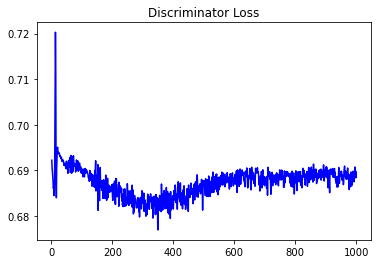

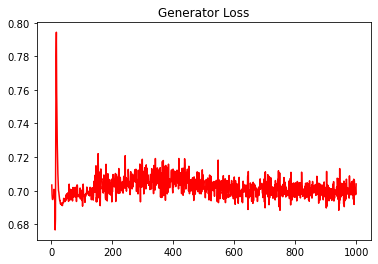

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.8159044046410184


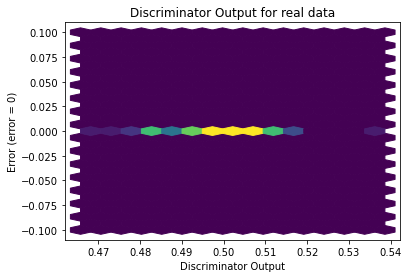

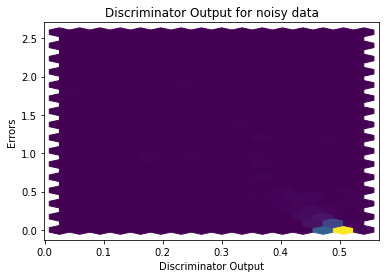

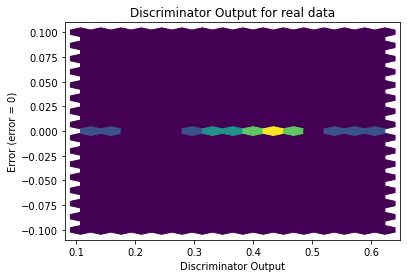

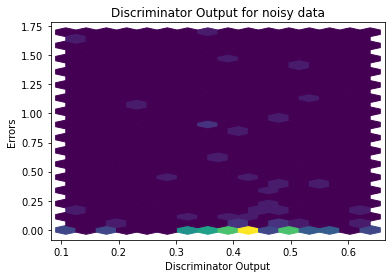

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


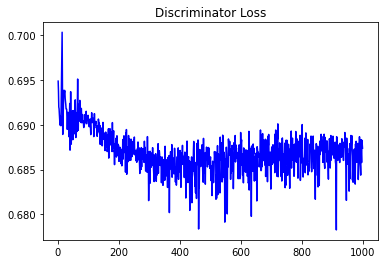

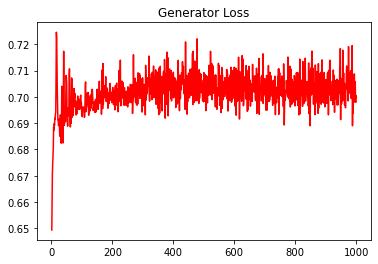

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6820931261215275


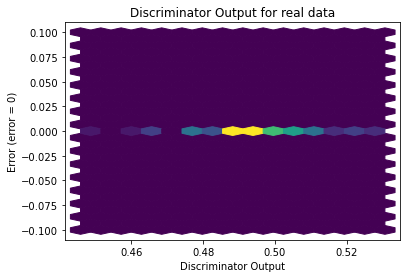

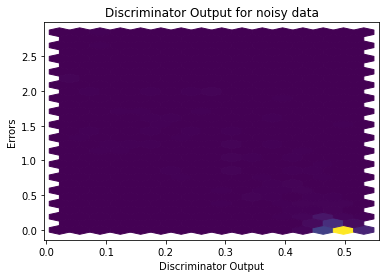

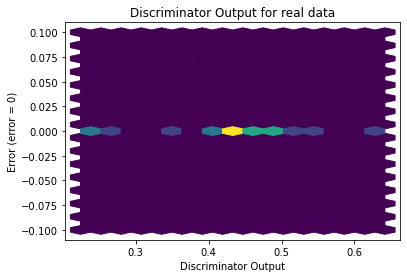

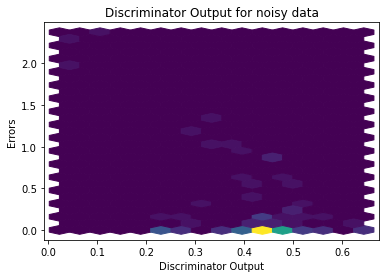

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8721]], requires_grad=True)
